# Data Peprocessing

## Missing Values

In [93]:
from sklearn import datasets
from amltlearn.preprocessing import Discretizer
from pylab import *
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

We obtain a corrupted copy of the iris dataset by adding some missing values

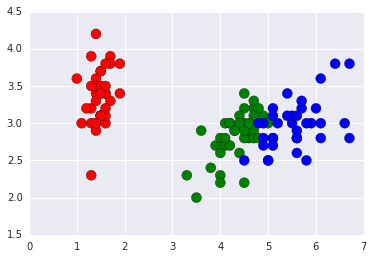

In [94]:
from sklearn.preprocessing import Imputer
from numpy.random import randint
iris = datasets.load_iris()
dimX, dimY = iris['data'].shape
lrandX = randint(dimX, size=75)
lrandY = randint(dimY, size=75)

lcols = [['r','g','b'][i]  for i in iris['target']]

for x,y in zip(lrandX,lrandY):
    iris['data'][x,y]=float('NaN')

plt.scatter(iris['data'][:, 2], iris['data'][:, 1], c=lcols,s=100)

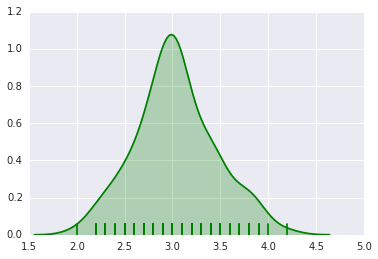

In [95]:
sns.distplot(iris['data'][:,1], hist=False, rug=True, color="g", kde_kws={"shade": True})
plt.show()

Now we apply a missing values imputer algorithm to complete the data

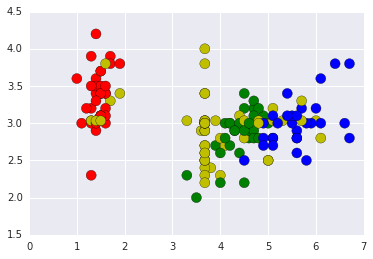

In [96]:
for i in lrandX:
    lcols[i] = 'y'
imp = Imputer(missing_values='NaN', strategy='mean')
imp_iris = imp.fit_transform(iris['data'])
plt.scatter(imp_iris[:, 2], imp_iris[:, 1], c=lcols,s=100)

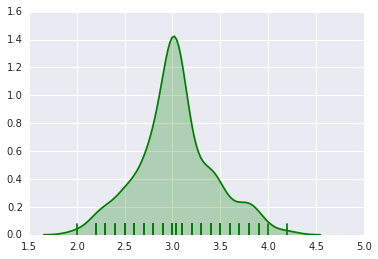

In [97]:
sns.distplot(imp_iris[:,1], hist=False, rug=True, color="g", kde_kws={"shade": True})
plt.show()

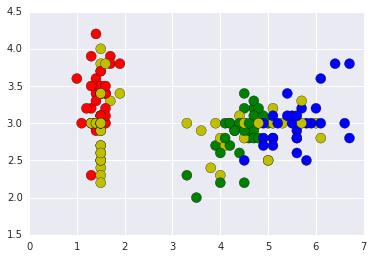

In [98]:
imp = Imputer(missing_values='NaN', strategy='most_frequent')
imp_iris = imp.fit_transform(iris['data'])
plt.scatter(imp_iris[:, 2], imp_iris[:, 1], c=lcols,s=100)

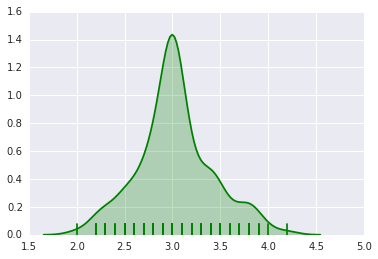

In [99]:
sns.distplot(imp_iris[:,1], hist=False, rug=True, color="g", kde_kws={"shade": True})
plt.show()

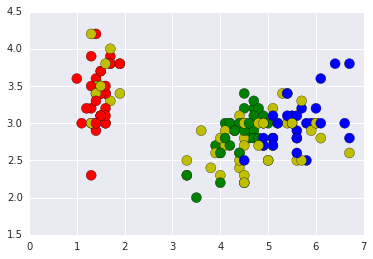

In [100]:
from amltlearn.preprocessing import KnnImputer
knnimp = KnnImputer(missing_values='NaN', n_neighbors=1)
imp_iris = knnimp.fit_transform(iris['data'])

plt.scatter(imp_iris[:, 2], imp_iris[:, 1], c=lcols,s=100)

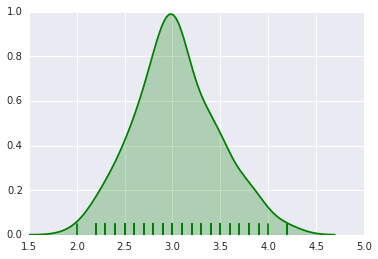

In [101]:
sns.distplot(imp_iris[:,1], hist=False, rug=True, color="g", kde_kws={"shade": True})
plt.show()